#### Imports Libraries
***

In [18]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 

#### Read Datas From CSV
***

In [19]:
dData = pd.read_csv('diabetes_prediction_dataset.csv')  #Read From The CSV file

In [20]:
dData.dtypes     

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

From the dtypes function above, we can conclude that of all variables:

   >- Gender, Hyper Tension, Heart Disease,Smoking History and Diabetes are considered as Categorical Datas 
   
   >- Age, Bmi , HbA1c Level and Blood Glucose Level is considered as Numerical Data

In [21]:
dData.shape

(100000, 9)

From shape function we can tell the size of data:
   > 1)Size = 100000,Column = 9

##  B) Cleaning of Data
***
In this section we plan to check for outliers and null values that are useless for out data and clean it so that it will be more accurate

### Checking for Null values
***

   >We first check for null data sets that are to be removed or replaced

In [22]:
null_columns = dData.columns[dData.isnull().any()]
print(dData[null_columns].isnull().sum())

Series([], dtype: float64)


We noticed that there were no null data that was to be cleaned or replaced 

### Checking for range of Numerical Data Set 
***
   > By checking for min and max value across these datas we want to understand the dataset better and ensure that the values are scientifically possible, eliminating any possible human errors

In [23]:
# Check for lowest value
lowest_value1 = dData['age'].min()
lowest_value2 = dData['bmi'].min()
lowest_value3 = dData['HbA1c_level'].min()
lowest_value4 = dData['blood_glucose_level'].min()
print()


# Print the lowest value
print("The lowest value in the 'age' column is:", lowest_value1)
print("The lowest value in the 'bmi' column is:", lowest_value2)
print("The lowest value in the 'HbA1c_level' column is:", lowest_value3)
print("The lowest value in the 'blood_glucose_level' column is:", lowest_value4)
print()

# Check for highest value
highest_value1 = dData['age'].max()
highest_value2 = dData['bmi'].max()
highest_value3 = dData['HbA1c_level'].max()
highest_value4 = dData['blood_glucose_level'].max()

# Print the highest value
print("The highest value in the 'age' column is:", highest_value1)
print("The highest value in the 'bmi' column is:", highest_value2)
print("The highest value in the 'HbA1c_level' column is:", highest_value3)
print("The highest value in the 'blood_glucose_level' column is:", highest_value4)
print("")

#For Categorical Data, we need to check the total number to catergories per variable
print("The amount of unique values in the 'gender' column is: ", len(dData['gender'].unique()))
print("The amount of unique values in the 'hypertension' column is: ", len(dData['hypertension'].unique()))
print("The amount of unique values in the 'heart_disease' column is: ", len(dData['heart_disease'].unique()))
print("The amount of unique values in the 'smoking_history' column is: ", len(dData['smoking_history'].unique()))
print("The amount of unique values in the 'diabetes' column is: ", len(dData['diabetes'].unique()))



The lowest value in the 'age' column is: 0.08
The lowest value in the 'bmi' column is: 10.01
The lowest value in the 'HbA1c_level' column is: 3.5
The lowest value in the 'blood_glucose_level' column is: 80

The highest value in the 'age' column is: 80.0
The highest value in the 'bmi' column is: 95.69
The highest value in the 'HbA1c_level' column is: 9.0
The highest value in the 'blood_glucose_level' column is: 300

The amount of unique values in the 'gender' column is:  3
The amount of unique values in the 'hypertension' column is:  2
The amount of unique values in the 'heart_disease' column is:  2
The amount of unique values in the 'smoking_history' column is:  6
The amount of unique values in the 'diabetes' column is:  2


While the extreme ends of the data may seem unimaginable, through further corroboration with online sources, we have come to the conclusion that all these ranges of values for the respective predictors are possible. For example the data that seems to stand out - the minimum age of 0.08 translated to a 29 days newborn. Through pure observation of this dataset only, it is hard to believe that a newborn could be a part of this dataset but upon online research, the range of blood glucose level for a 4 weeks newborn is 70 to 150mg/dL which falls within the range of the predictor blood glucose level.

### Cleaning outliers from data
***
 > For all numerical datas, we have decided to visualise the datas through a boxplot to identify the outliers and remove them as part of data cleaning
    

#### BMI distribution
***

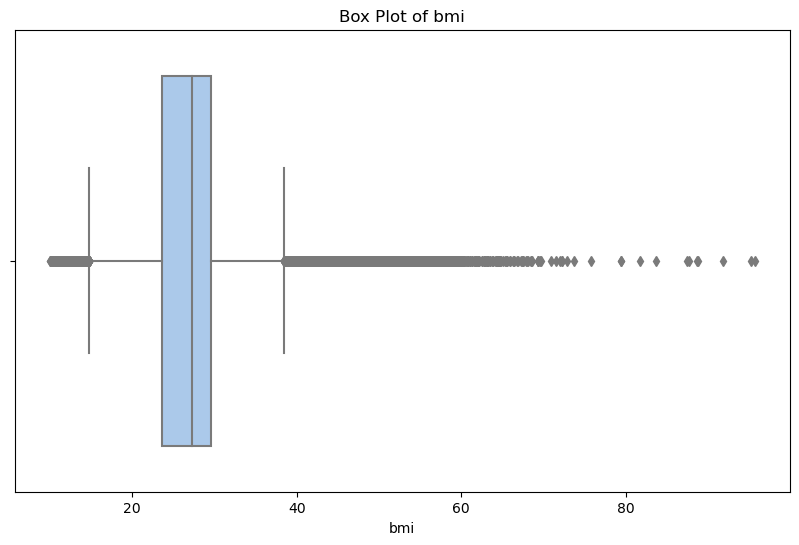

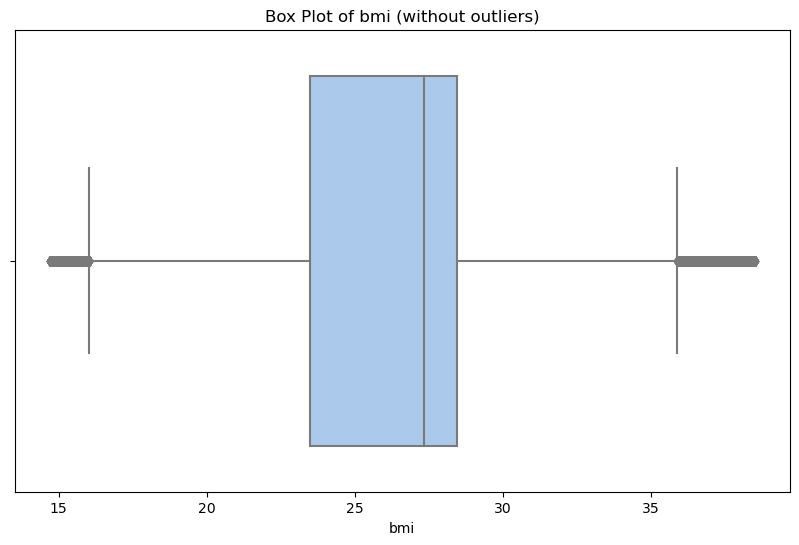

In [24]:
# Create BoxPLOT 
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["bmi"], palette="pastel")
plt.xlabel("bmi")
plt.title("Box Plot of bmi")

# Defining and cleaning outliers
Q1 = dData["bmi"].quantile(0.25)
Q3 = dData["bmi"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["bmi"] >= lower_bound) & (dData["bmi"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["bmi"], palette="pastel")
plt.xlabel("bmi")
plt.title("Box Plot of bmi (without outliers)")

plt.show()

#### HbA1c_Level Distribution
***

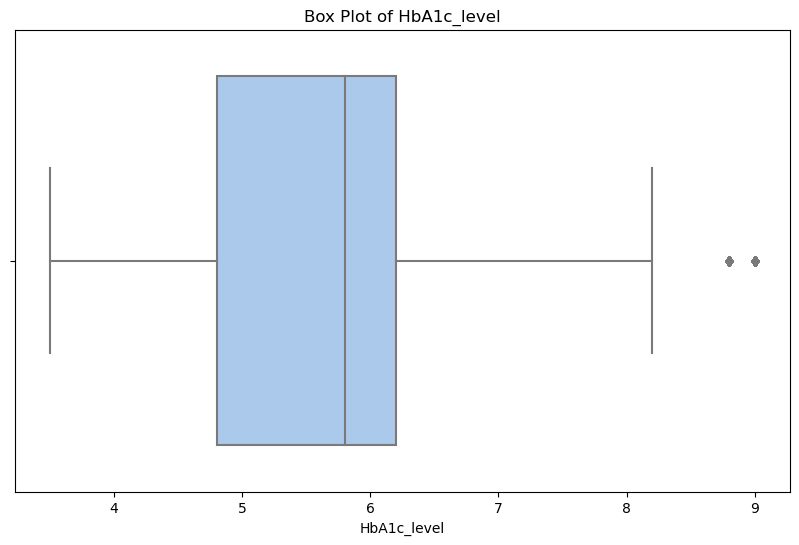

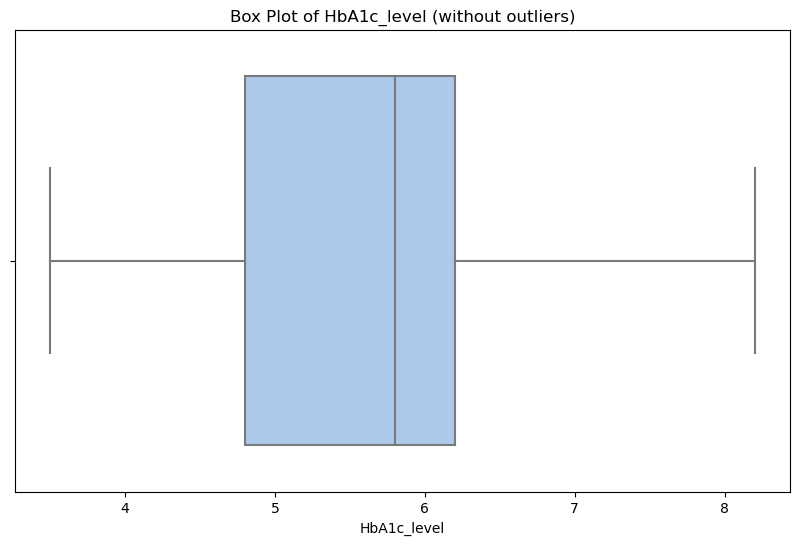

In [25]:
# Create a Boxplot
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["HbA1c_level"], palette="pastel")
plt.xlabel("HbA1c_level")
plt.title("Box Plot of HbA1c_level")

# Defining and Cleaning the data
Q1 = dData["HbA1c_level"].quantile(0.25)
Q3 = dData["HbA1c_level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["HbA1c_level"] >= lower_bound) & (dData["HbA1c_level"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["HbA1c_level"], palette="pastel")
plt.xlabel("HbA1c_level")
plt.title("Box Plot of HbA1c_level (without outliers)")

plt.show()

#### Blood_Glucose_Level Distribution
***

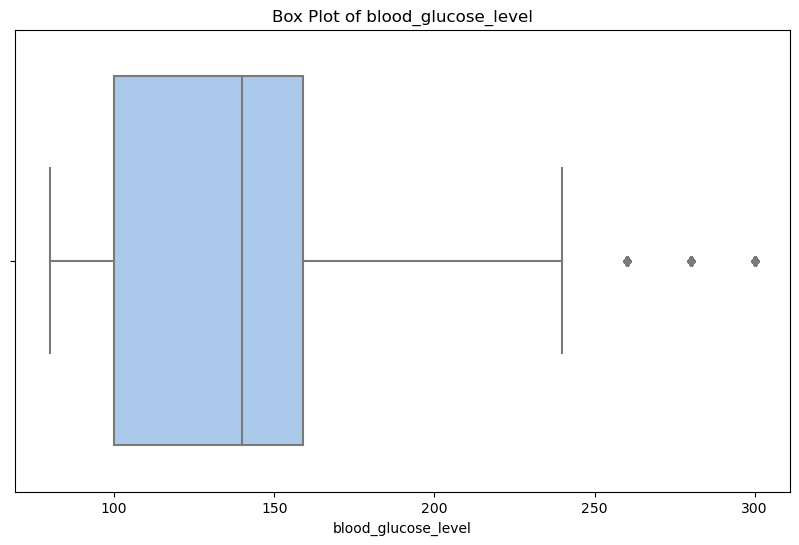

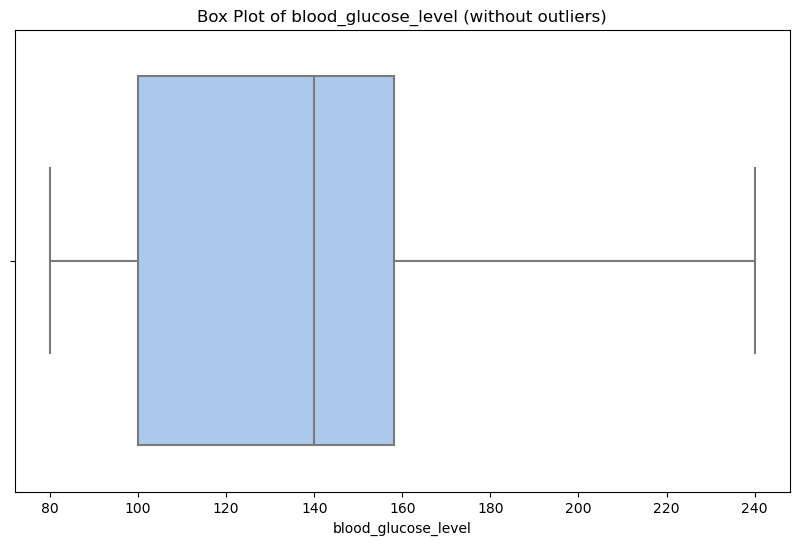

In [26]:
# Create a boxplot of the original data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["blood_glucose_level"], palette="pastel")
plt.xlabel("blood_glucose_level")
plt.title("Box Plot of blood_glucose_level")

# Defining and cleaning outliers
Q1 = dData["blood_glucose_level"].quantile(0.25)
Q3 = dData["blood_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["blood_glucose_level"] >= lower_bound) & (dData["blood_glucose_level"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["blood_glucose_level"], palette="pastel")
plt.xlabel("blood_glucose_level")
plt.title("Box Plot of blood_glucose_level (without outliers)")

plt.show()

#### Age Distribution
***

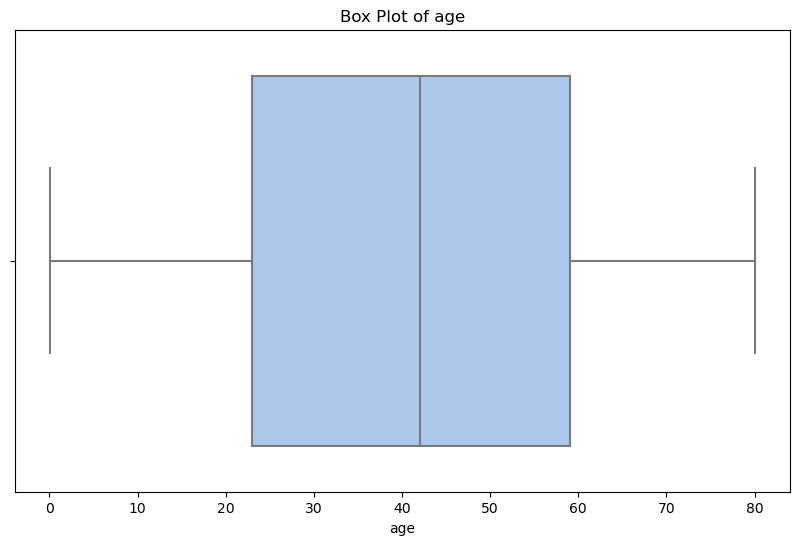

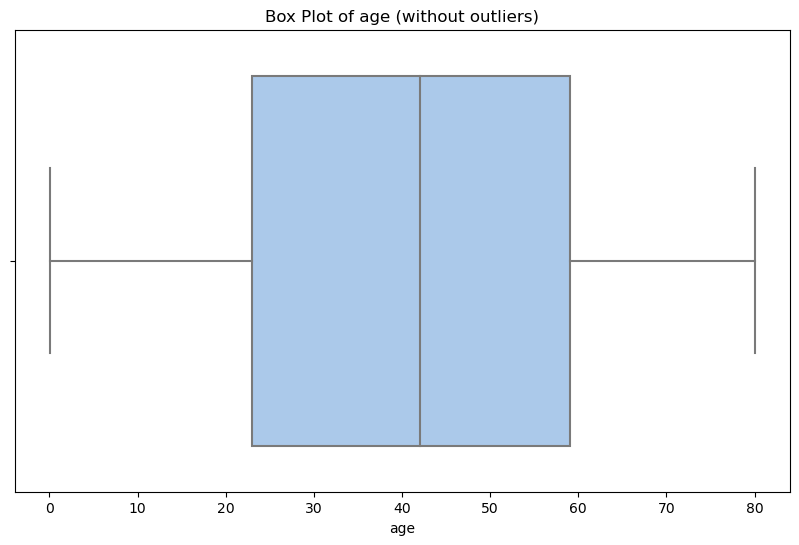

In [27]:
# Create a boxplot of the original data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["age"], palette="pastel")
plt.xlabel("age")
plt.title("Box Plot of age")

# Defining and cleaning outliers
Q1 = dData["age"].quantile(0.25)
Q3 = dData["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dData = dData[(dData["age"] >= lower_bound) & (dData["age"] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10,6))
sb.boxplot(x=dData["age"], palette="pastel")
plt.xlabel("age")
plt.title("Box Plot of age (without outliers)")

plt.show()

In [28]:
dData.to_csv('cleaned_data.csv', index=False)